Victor Pugliese ____________Github link:https://github.com/VictorPuglieseManotas e-mail: victor.pugliese@ttu.edu

Dr. Raymond Eghorieta __________________________________________________________ e-mail: raymond.eghorieta@ttu.edu

Dr. Ekarit Panacharoensawad_Github link:https://github.com/epmmko ______________ e-mail: ekarit.panacharoensawad@ttu.edu

# Drift Velocity Analysis

## 1. Introduction

Dimensionles gruoups have been applied by many researchers to estimate the rise velocity of a single bubble moving in liquid in pipe under the influence of gravitational, inertial, viscous and interfacial forces. These are: Reynolds Number, Eotvos number, Viscosyty Number, Bouyancy Reynolds Number and Froud Number.
The objetive of this analysis is to find a model to relate the Froud Number with the rest of dimensionless group. Then, we could use Davies and Taylor (1950) clousure relationship combined with Bendiksen (1984), to calculate the drift velocity.

In [1]:
#Libraries used
%matplotlib inline                 
import os                          
import numpy as np                 
import pandas as pd                
import matplotlib.pyplot as plt    
import time
import warnings
warnings.filterwarnings('ignore')  #Never print matching warnings

## 2. Data Preparation
### 2.1. Load Data
The information is taken from the excel file in VictorPuglieseManotas's repository named Research. In this way, any person could download the raw data: https://github.com/VictorPuglieseManotas/Research/blob/master/Drift_Velocity_Analysis.xlsx. This file is saved in a local directory.

In [2]:
Experimental_Data=pd.read_excel(r"C:\Users\victo\Train_Set_Drift_Velocity_Analysis_O.xlsx")
Experimental_Data=Experimental_Data.iloc[np.random.permutation(len(Experimental_Data))]

D=np.asarray(Experimental_Data['Diameter [m]'])
rho_L=np.asarray(Experimental_Data['rhoL [kg/m3]'])
rho_G=np.asarray(Experimental_Data['rhoG [kg/m3]'])
V_d_real=np.asarray(Experimental_Data['Drift Velocity [m/s]'])

Experimental_Data.head()                                                                  

,Inclination [°],Cos(Angle),Sin(Angle),Temperature [C],rhoL [kg/m3],rhoG [kg/m3],muL [Pa.s],sigma [N/m],Liquid Type,Diameter [m],Drift Velocity [m/s],Reynolds Number Re,Buoyancy Reynolds R,Eotvos Number Eo,Viscosity Number Nmu,Froud Number Fr
82,70.0,3.420201e-01,0.939693,16.1,891.0,1.220953,0.934,0.0295,Oil,0.0508,0.204,0.013547,34.181331,763.322842,0.029276,0.289225
88,30.0,8.660254e-01,0.500000,10.6,895.0,1.244631,1.287,0.0295,Oil,0.0508,0.173,0.008499,24.917141,766.734045,0.040161,0.245277
32,70.0,3.420201e-01,0.939693,50.0,869.0,1.092809,0.104,0.0295,Oil,0.0508,0.294,0.156936,299.411928,744.559434,0.003342,0.416801
99,70.0,3.420201e-01,0.939693,21.4,886.0,1.198972,0.574,0.0295,Oil,0.1524,0.508,0.161713,287.385972,6831.470731,0.003482,0.415820
100,90.0,6.125742e-17,1.000000,21.4,886.0,1.198972,0.574,0.0295,Oil,0.1524,0.379,0.120648,287.385972,6831.470731,0.003482,0.310228


Now, we only will use the dimensionless group and the unit vectors:

In [3]:
Experimental_Data=Experimental_Data.drop(Experimental_Data.columns[[0,3,4,5,6,7,8,9,10,11,14]], axis=1)
Experimental_Data.head()

,Cos(Angle),Sin(Angle),Buoyancy Reynolds R,Eotvos Number Eo,Froud Number Fr
82,3.420201e-01,0.939693,34.181331,763.322842,0.289225
88,8.660254e-01,0.500000,24.917141,766.734045,0.245277
32,3.420201e-01,0.939693,299.411928,744.559434,0.416801
99,3.420201e-01,0.939693,287.385972,6831.470731,0.415820
100,6.125742e-17,1.000000,287.385972,6831.470731,0.310228


### 2.2. Creating the Train and Test set
The train set will be the experimental data gathered from other researchers. On the other hand, the Test set will be the experimental data obtained by the authors of this document in the Petroleum Engineering Labs in Texas Tech University.

Analizing the data set, we suggest a polinomial relationship between the sinoidal functions and the Froud number. Similarly, we suggest a logaritmic relationship between the Eotvos number, Buoyancy Reynolds number and Froud Number.

In [4]:
Dimensionless_Labels=Experimental_Data['Froud Number Fr']
Dimensionless_Attributes=Experimental_Data.drop('Froud Number Fr',axis=1)
Dimensionless_Attributes_for_eval=Dimensionless_Attributes                                  #Copy for evalatuation of the model
Dimensionless_Attributes['Cos(Angle)^2']=Dimensionless_Attributes['Cos(Angle)']**2
Dimensionless_Attributes['Cos(Angle)^3']=Dimensionless_Attributes['Cos(Angle)']**3
Dimensionless_Attributes['Sin(Angle)^2']=Dimensionless_Attributes['Sin(Angle)']**2
Dimensionless_Attributes['Sin(Angle)^3']=Dimensionless_Attributes['Sin(Angle)']**3
Dimensionless_Attributes['Ln(Eo)']=np.log(Dimensionless_Attributes['Eotvos Number Eo'])
Dimensionless_Attributes['Ln(R)']=np.log(Dimensionless_Attributes['Buoyancy Reynolds R'])
Dimensionless_Attributes=Dimensionless_Attributes.drop('Eotvos Number Eo',axis=1)
Dimensionless_Attributes=Dimensionless_Attributes.drop('Buoyancy Reynolds R',axis=1)
Dimensionless_Attributes.head()

,Cos(Angle),Sin(Angle),Cos(Angle)^2,Cos(Angle)^3,Sin(Angle)^2,Sin(Angle)^3,Ln(Eo),Ln(R)
82,3.420201e-01,0.939693,1.169778e-01,4.000876e-02,0.883022,0.829769,6.637681,3.531680
88,8.660254e-01,0.500000,7.500000e-01,6.495191e-01,0.250000,0.125000,6.642140,3.215556
32,3.420201e-01,0.939693,1.169778e-01,4.000876e-02,0.883022,0.829769,6.612793,5.701820
99,3.420201e-01,0.939693,1.169778e-01,4.000876e-02,0.883022,0.829769,8.829295,5.660826
100,6.125742e-17,1.000000,3.752472e-33,2.298668e-49,1.000000,1.000000,8.829295,5.660826


## 3. Machine Learning Model
### 3.1. Preprocessing
"Many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected". [1]

In [5]:
from sklearn import preprocessing
scaler=preprocessing.RobustScaler().fit(Dimensionless_Attributes)
Dimensionless_Attributes_Scaled=scaler.transform(Dimensionless_Attributes)

### 3.2. Support Vector Regressor

In [6]:
from sklearn.svm import SVR
svr_rbf_reg = SVR(kernel="rbf",C=100,epsilon=0.1)
svr_rbf_reg

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### 3.2. Training the Model
The problem of Drift Velocity has been addressed. The initial experiment data has been clean and modified in order to have features that are related with the Froud Number. Also, we have shuffled the instances. The training set is used in this stage to fit the model parameters. However, we will test it using the test set. In the following code, we perform the training procedure, we obtain a measurement of its perfomance (custom function: average relative error) and the time required to be fitted and to predict.

In [7]:
def relative_error(y_true, y_pred):
    rel_error=np.sum(np.divide(np.abs(y_true-y_pred),np.mean(y_true)))/len(y_true)
    return rel_error

start = time.time()
svr_rbf_reg.fit(Dimensionless_Attributes_Scaled,Dimensionless_Labels)
y_pred=svr_rbf_reg.predict(Dimensionless_Attributes_Scaled)
print(svr_rbf_reg.__class__.__name__,' average_relative_error: ',relative_error(Dimensionless_Labels,y_pred))
end = time.time()
print(svr_rbf_reg.__class__.__name__,' Time: ',end - start)

SVR  average_relative_error:  0.13795733771883864
SVR  Time:  0.0009546279907226562


### 3.3. Tunnig the Model

In [8]:
from sklearn.metrics import make_scorer
score_rel_error=make_scorer(relative_error, greater_is_better=False)

from sklearn.model_selection import GridSearchCV
param_grid=[{'kernel':['rbf','sigmoid'],'C':[5,6,7,8,9,10],
            'epsilon':[0.0001,0.0005,0.001,0.005,0.008,0.01,0.02,0.05,0.1,0.2]}]
svr_reg=SVR()
grid_search=GridSearchCV(svr_reg,param_grid,cv=100,scoring=score_rel_error)
start = time.time()
grid_search.fit(Dimensionless_Attributes_Scaled,Dimensionless_Labels)
end = time.time()
print(end - start)
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print((-mean_score),params)

36.12571477890015
0.07410791557219269 {'C': 5, 'epsilon': 0.0001, 'kernel': 'rbf'}
19.847892199393883 {'C': 5, 'epsilon': 0.0001, 'kernel': 'sigmoid'}
0.07376710734408777 {'C': 5, 'epsilon': 0.0005, 'kernel': 'rbf'}
19.847917287433972 {'C': 5, 'epsilon': 0.0005, 'kernel': 'sigmoid'}
0.07327449898407688 {'C': 5, 'epsilon': 0.001, 'kernel': 'rbf'}
19.860615188949627 {'C': 5, 'epsilon': 0.001, 'kernel': 'sigmoid'}
0.06774433250302292 {'C': 5, 'epsilon': 0.005, 'kernel': 'rbf'}
19.880830538210542 {'C': 5, 'epsilon': 0.005, 'kernel': 'sigmoid'}
0.06458947244104075 {'C': 5, 'epsilon': 0.008, 'kernel': 'rbf'}
19.85914852026755 {'C': 5, 'epsilon': 0.008, 'kernel': 'sigmoid'}
0.06442086106024562 {'C': 5, 'epsilon': 0.01, 'kernel': 'rbf'}
19.86167038688722 {'C': 5, 'epsilon': 0.01, 'kernel': 'sigmoid'}
0.07185134380958424 {'C': 5, 'epsilon': 0.02, 'kernel': 'rbf'}
19.900713291546108 {'C': 5, 'epsilon': 0.02, 'kernel': 'sigmoid'}
0.10026307081639034 {'C': 5, 'epsilon': 0.05, 'kernel': 'rbf'}
19.4

In [9]:
grid_search.best_estimator_

SVR(C=8, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### 3.3.1. Support Vectors, Dual Coefficient & Intercept

In [10]:
svr=grid_search.best_estimator_
svr.fit(Dimensionless_Attributes_Scaled,Dimensionless_Labels)
svr.support_vectors_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.86462543e-02, -8.24529902e-01],
       [-8.01017491e-01,  5.15746160e-01, -7.23101839e-01,
        -6.42524000e-01,  7.23101839e-01,  8.50033963e-01,
        -6.54464019e-02,  5.85390151e-01],
       [-8.01017491e-01,  5.15746160e-01, -7.23101839e-01,
        -6.42524000e-01,  7.23101839e-01,  8.50033963e-01,
         7.04105086e+00,  5.62143037e-01],
       [-1.32384453e+00,  5.86484893e-01, -8.56725658e-01,
        -6.84699803e-01,  8.56725658e-01,  1.05535179e+00,
         7.04105086e+00,  5.62143037e-01],
       [ 2.02704508e-01, -5.25096398e-01,  2.82446398e-01,
         3.65136355e-01, -2.82446398e-01, -1.50591644e-01,
        -2.09089040e+00, -2.10608855e-01],
       [-3.41251112e-01,  3.12062094e-01, -3.84754452e-01,
        -4.04730254e-01,  3.84754452e-01,  3.91424952e-01,
         1.43501385e-02, -6.45261320e-01],
       [-1.52835294e-01,  1.674855

In [11]:
svr.dual_coef_ 

array([[-8.        ,  1.92421541,  8.        , -5.43067045,  8.        ,
         8.        ,  0.75837865,  8.        , -0.21875866, -8.        ,
         8.        , -1.25571676, -3.57216227, -8.        , -8.        ,
         0.53274498, -8.        ,  8.        , -1.00003778, -8.        ,
         0.44491539,  8.        ,  8.        ,  3.54009887,  8.        ,
         8.        ,  0.51469818, -1.3126408 ,  1.66107794, -2.96284527,
         8.        , -0.98895365,  3.21277263, -8.        , -8.        ,
        -8.        , -4.12262767,  8.        ,  8.        , -8.        ,
         1.6162013 ,  3.46086358,  8.        , -8.        ,  8.        ,
        -8.        ,  5.22664343, -8.        , -0.71584474, -3.85101055,
        -8.        ,  5.2447307 , -8.        ,  1.76667   , -0.88679346,
        -1.52194852, -8.        , -8.        ,  7.8714708 , -8.        ,
         7.58399762,  8.        ,  1.47120001, -2.17639395, -5.78926695,
         3.59869708,  1.37629492,  8.        , -8. 

In [12]:
svr.intercept_

array([0.18901934])

### 3.3.2. Pipeline
"Transformers are usually combined with classifiers, regressors or other estimators to build a composite estimator. The most common tool is a Pipeline. Pipeline is often used in combination with FeatureUnion which concatenates the output of transformers into a composite feature space." [2]
In our application, we are going to form a regressor which first receives the fluids properties and pipe geometry for each observation, then scales the experimental results and finally, performs the prediction.

In [13]:
def drift_vel_calc(initial_data):
    def input_transformer(initial_data):
        import numpy as np
        import pandas as pd
        inputdf=pd.DataFrame()
        inputdf['Cos(Angle)']=np.cos(initial_data['theta [rad]'])
        inputdf['Sin(Angle)']=np.sin(initial_data['theta [rad]'])
        inputdf['Buoyancy Reynolds R']=np.sqrt(initial_data['Diameter [m]']**3*initial_data['g [m/s2]']*(initial_data['rhoL [kg/m3]']-initial_data['rhoG [kg/m3]'])*initial_data['rhoL [kg/m3]'])/initial_data['muL [Pa.s]']
        inputdf['Eotvos Number Eo']=(initial_data['rhoL [kg/m3]']-initial_data['rhoG [kg/m3]'])*initial_data['g [m/s2]']*initial_data['Diameter [m]']**2/initial_data['sigma [N/m]']
        inputdf['Cos(Angle)^2']=inputdf['Cos(Angle)']**2
        inputdf['Cos(Angle)^3']=inputdf['Cos(Angle)']**3
        inputdf['Sin(Angle)^2']=inputdf['Sin(Angle)']**2
        inputdf['Sin(Angle)^3']=inputdf['Sin(Angle)']**3
        inputdf['Ln(Eo)']=np.log(inputdf['Eotvos Number Eo'])
        inputdf['Ln(R)']=np.log(inputdf['Buoyancy Reynolds R'])
        inputdf=inputdf.drop('Eotvos Number Eo',axis=1)
        inputdf=inputdf.drop('Buoyancy Reynolds R',axis=1)
        return inputdf
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import FunctionTransformer
    svr_estimator=make_pipeline(FunctionTransformer(input_transformer,validate=False),scaler,svr)
    Fr_pipe=svr_estimator.predict(initial_data)
    V_d_pipe=Fr_pipe*(np.cos(initial_data['theta [rad]'])+np.sin(initial_data['theta [rad]']))*np.power(initial_data['g [m/s2]']*initial_data['Diameter [m]']*(1-initial_data['rhoG [kg/m3]']/initial_data['rhoL [kg/m3]']),0.5)
    return V_d_pipe

from sklearn.preprocessing import FunctionTransformer
drift_vel_estimator=FunctionTransformer(drift_vel_calc,validate=False)

### 3.4. Saving the Model
The model is available to download from the following link:
https://github.com/VictorPuglieseManotas/Research/blob/master/drift_velocity_regressor.joblib

The file must be saved in the working directory.

In [14]:
from sklearn.externals import joblib
joblib.dump(drift_vel_estimator,'drift_velocity_estimator.joblib')

['drift_velocity_estimator.joblib']

### 3.5. Loading Model
To load the estimator in the user can use the following code:

In [15]:
drift_vel_estimator_loaded=joblib.load('drift_velocity_estimator.joblib')

### 3.6. Model Evaluation
For evaluation purpose, we are going to use the experimental data gather by Dr. Eghorieta, who got drift velocity of Taylor bubble in high viscosity oil for inclination angles from 0° to 10°. Also, we are going to present the prediction performance of Livinus et. al. model [3]

First, we check the performance using the Train Set.

Text(0.5,1,'Performance with Train Set')

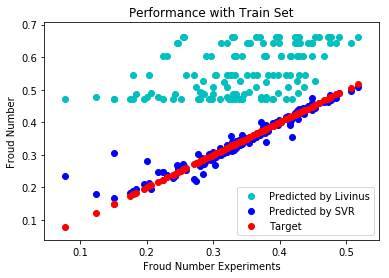

In [16]:
Dimensionless_Attributes=Dimensionless_Attributes_for_eval

Fr_l=np.power(10,-(0.0000007928*np.power(-np.log10(np.asarray(Dimensionless_Attributes['Buoyancy Reynolds R']/Dimensionless_Attributes['Eotvos Number Eo'])),7.443)+0.3276))
Fr_Livinus=Fr_l*np.asarray(Dimensionless_Attributes['Cos(Angle)']+Dimensionless_Attributes['Sin(Angle)'])

Fr_svr=svr.predict(Dimensionless_Attributes_Scaled)

plt.scatter(Dimensionless_Labels,Fr_Livinus,c='c')
plt.scatter(Dimensionless_Labels,Fr_svr,c='b')
plt.scatter(Dimensionless_Labels,Dimensionless_Labels,c='r')
plt.xlabel("Froud Number Experiments")
plt.ylabel("Froud Number")
plt.legend(("Predicted by Livinus","Predicted by SVR","Target"),loc='bottom right')
plt.title("Performance with Train Set")

Text(0.5,1,'Drift Velocity Prediction - Train Set')

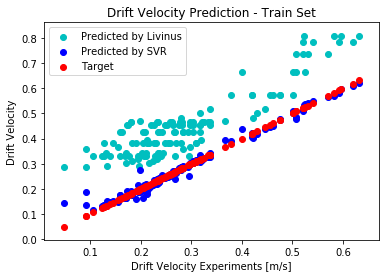

In [17]:
V_d_Livinus=Fr_Livinus*np.power(9.80665*D*(1-rho_G/rho_L),0.5)
V_d_svr=Fr_svr*np.power(9.80665*D*(1-rho_G/rho_L),0.5)

plt.scatter(V_d_real,V_d_Livinus,c='c')
plt.scatter(V_d_real,V_d_svr,c='b')
plt.scatter(V_d_real,V_d_real,c='r')
plt.xlabel("Drift Velocity Experiments [m/s]")
plt.ylabel("Drift Velocity")
plt.legend(("Predicted by Livinus","Predicted by SVR","Target"),loc='bottom right')
plt.title("Drift Velocity Prediction - Train Set")

Now, we evaluate the performance using the Test Set.

Text(0.5,1,'Performance with Test Set')

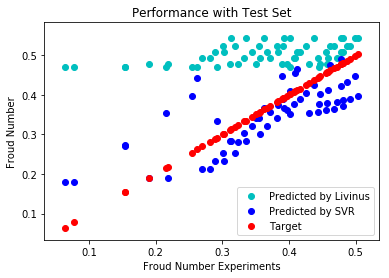

In [18]:
Test_Set=pd.read_excel(r"C:\Users\victo\Test_Set_Drift_Velocity_Analysis_O.xlsx")

Fr_real=np.asarray(Test_Set['Froud Number Fr'])
V_d_real=np.asarray(Test_Set['Drift Velocity [m/s]'])

Fr_l=np.power(10,-(0.0000007928*np.power(-np.log10(np.asarray(Test_Set['Buoyancy Reynolds R']/Test_Set['Eotvos Number Eo'])),7.443)+0.3276))
Fr_Livinus=Fr_l*np.asarray(Test_Set['Cos(Angle)']+Test_Set['Sin(Angle)'])

Test_Set=Test_Set.drop(Test_Set.columns[[0,3,4,5,6,7,8,9,10,11,14,15]], axis=1)
Test_Set['Cos(Angle)^2']=Test_Set['Cos(Angle)']**2
Test_Set['Cos(Angle)^3']=Test_Set['Cos(Angle)']**3
Test_Set['Sin(Angle)^2']=Test_Set['Sin(Angle)']**2
Test_Set['Sin(Angle)^3']=Test_Set['Sin(Angle)']**3
Test_Set['Ln(Eo)']=np.log(Test_Set['Eotvos Number Eo'])
Test_Set['Ln(R)']=np.log(Test_Set['Buoyancy Reynolds R'])
Test_Set=Test_Set.drop('Eotvos Number Eo',axis=1)
Test_Set=Test_Set.drop('Buoyancy Reynolds R',axis=1)

Fr_svr_Test=svr.predict(scaler.transform(Test_Set))

plt.scatter(Fr_real,Fr_Livinus,c='c')
plt.scatter(Fr_real,Fr_svr_Test,c='b')
plt.scatter(Fr_real,Fr_real,c='r')
plt.xlabel("Froud Number Experiments")
plt.ylabel("Froud Number")
plt.legend(("Predicted by Livinus","Predicted by SVR","Target"),loc='bottom right')
plt.title("Performance with Test Set")

For Livinus et.al. model, the drift velocity can therefore be calculated from the following equation, using the predicted Froud Number:
v_d=Fr[gD(1-rho_g/rho_l)]^0.5


Text(0.5,1,'Drift Velocity Prediction - Test Set')

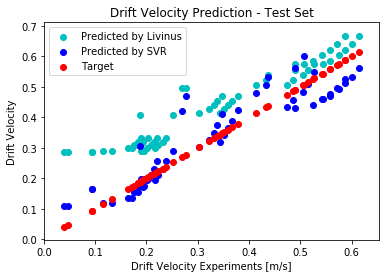

In [19]:
Test_Set=pd.read_excel(r"C:\Users\victo\Test_Set_Drift_Velocity_Analysis_O.xlsx")

D=np.asarray(Test_Set['Diameter [m]'])
rho_L=np.asarray(Test_Set['rhoL [kg/m3]'])
rho_G=np.asarray(Test_Set['rhoG [kg/m3]'])

V_d_Livinus=Fr_Livinus*np.power(9.80665*D*(1-rho_G/rho_L),0.5)


Test_Set['theta [rad]']=np.pi*Test_Set['Inclination [°]']/180
Test_Set=Test_Set.drop(Test_Set.columns[[0,1,2,3,8,10,11,12,13,14,15]], axis=1)
Test_Set['g [m/s2]']=9.80665*np.ones(len(Test_Set))

V_d_svr=drift_vel_estimator_loaded.transform(Test_Set)

plt.scatter(V_d_real,V_d_Livinus,c='c')
plt.scatter(V_d_real,V_d_svr,c='b')
plt.scatter(V_d_real,V_d_real,c='r')
plt.xlabel("Drift Velocity Experiments [m/s]")
plt.ylabel("Drift Velocity")
plt.legend(("Predicted by Livinus","Predicted by SVR","Target"),loc='bottom right')
plt.title("Drift Velocity Prediction - Test Set")

It is important to note that the input for the "drift_velocity_estimator" must be a panda DataFrame, as follow:

In [20]:
Test_Set.head()

,rhoL [kg/m3],rhoG [kg/m3],muL [Pa.s],sigma [N/m],Diameter [m],theta [rad],g [m/s2]
0,889.0,1.225,0.14,0.025,0.037592,0.000000,9.80665
1,889.0,1.225,0.14,0.025,0.037592,0.017453,9.80665
2,889.0,1.225,0.14,0.025,0.037592,0.052360,9.80665
3,889.0,1.225,0.14,0.025,0.037592,0.087266,9.80665
4,889.0,1.225,0.14,0.025,0.037592,0.122173,9.80665


According the Froud Number prediction from the Suppor Vector Machine Regressor, we can see that a simplified model, using a constant Froud number can perform a good drift velocity prediction.

Text(0.5,1,'Drift Velocity Prediction')

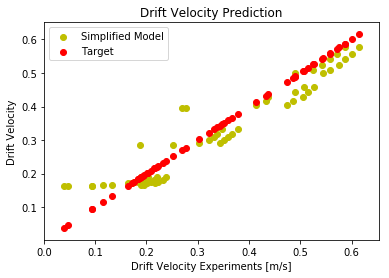

In [21]:
V_d_simplified=0.36219587*(np.cos(Test_Set['theta [rad]'])+np.sin(Test_Set['theta [rad]']))*np.power(Test_Set['g [m/s2]']*Test_Set['Diameter [m]']*(1-Test_Set['rhoG [kg/m3]']/Test_Set['rhoL [kg/m3]'])*np.power(Test_Set['muL [Pa.s]'],-0.00005),0.8)

plt.scatter(V_d_real,V_d_simplified,c='y')
plt.scatter(V_d_real,V_d_real,c='r')
plt.xlabel("Drift Velocity Experiments [m/s]")
plt.ylabel("Drift Velocity")
plt.legend(("Simplified Model","Target"),loc='bottom right')
plt.title("Drift Velocity Prediction")

Now, we use the mean squared error and the r2 score as metrics to measure the performance of the model.

In [22]:
from sklearn.metrics import mean_squared_error

mean_squared_error(V_d_real,V_d_Livinus)

0.013802881994733791

In [23]:
mean_squared_error(V_d_real,V_d_svr)

0.0036117782054024042

In [24]:
mean_squared_error(V_d_real,V_d_simplified)

0.0026076783451488158

In [25]:
relative_error(V_d_real,V_d_Livinus)

0.31083583405972315

In [26]:
relative_error(V_d_real,V_d_svr)

0.13742808510138457

In [27]:
relative_error(V_d_real,V_d_simplified)

0.12118619296449928

## 4. References
[1] http://scikit-learn.org/stable/modules/preprocessing.html

[2] http://scikit-learn.org/stable/modules/compose.html#combining-estimators

[3] Livinus, Aniefiok, Patrick Verdin, Liyun Lao, Jan Nossen, Morten Langsholt, and Hans-Gunnar Sleipnaes. "Simplified generalised drift velocity correlation for elongated bubbles in liquid in pipes." Journal of Petroleum Science and Engineering. Vol. 160, 2018: 106-118.
